Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



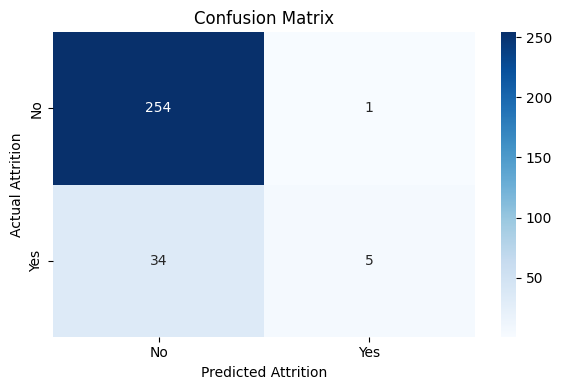

<ipython-input-14-38c745705a5d>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="viridis")


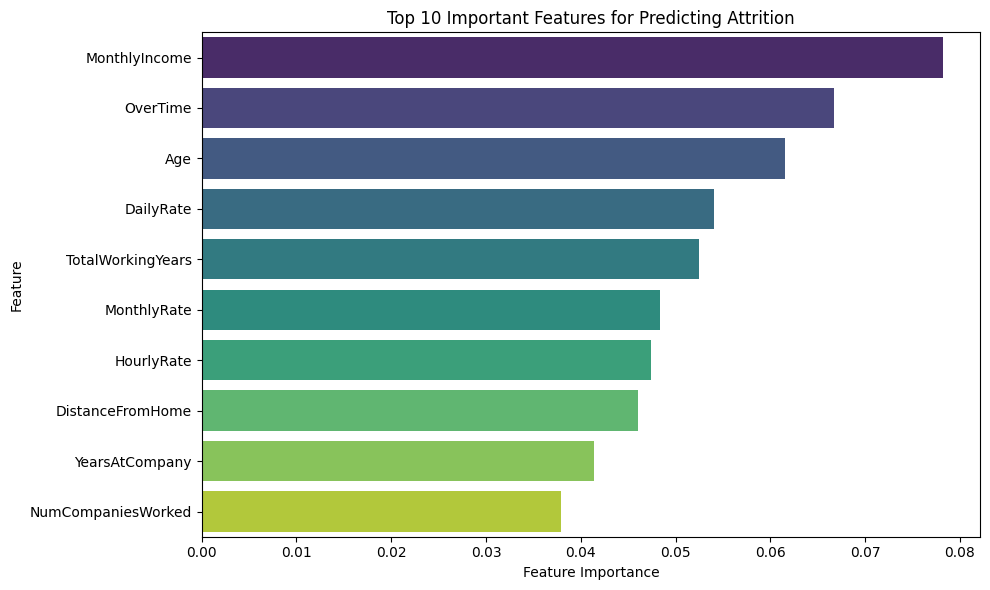

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("6. Predict Employee Attrition.csv")

# Copy the dataframe
data = df.copy()

# Convert target variable to binary
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Drop non-informative columns
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Encode categorical variables
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].apply(LabelEncoder().fit_transform)

# Define features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Attrition')
plt.ylabel('Actual Attrition')
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = clf.feature_importances_
feat_names = X.columns
feat_importances = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="viridis")
plt.title('Top 10 Important Features for Predicting Attrition')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()